# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [5]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames


import visuals as vs

%matplotlib inline


try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [6]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [7]:
indices = [3,100, 251]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,11594,7779,12144,3252,8035,3029
2,6134,23133,33586,6746,18594,5121


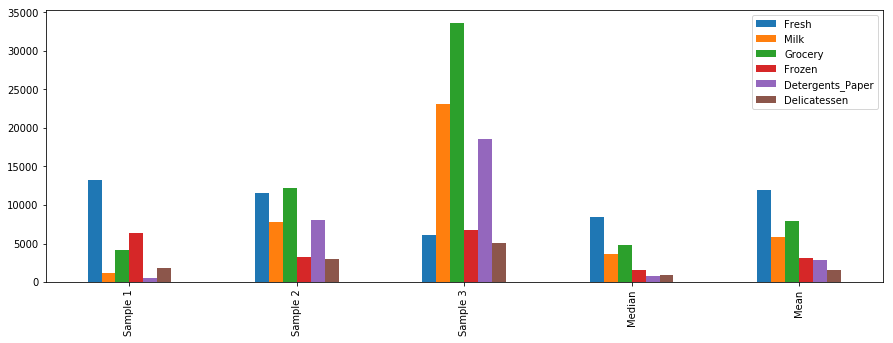

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

samples_for_plot = samples.copy()
samples_for_plot.loc[3] = data.median()
samples_for_plot.loc[4] = data.mean()

labels = ['Sample 1', 'Sample 2', 'Sample 3', 'Median', 'Mean']
samples_for_plot.plot(kind='bar', figsize=(15, 5))
plt.xticks(range(5), labels)
plt.show()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


To answer the question, the spendings on each categories are compared with values in different quantiles 

1. 3st customer
 - Deli
the spendings on 'fresh' and 'delicatessen' are greater than the median value, which suggested that it is a business with higher than average demand for those goods. Deli is one of the possible options. Another establishment such as cafe also have similar demands for those categories. But it seems that cafe may need to purchase large amount of milk product which is not shown in spending pattern for this customer

2. 100th customer
 - wholesale retailer
the spendings on all categories exceed the median values. it has large demand for all of these items

3. 251th customer
  - wholesale retailer
Except fresh product, all other spendings exceed the 75th quantiles. It may be a larger wholesale retailer than the previous one but with less focus fresh product


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [9]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
milk = data['Milk']
new_data = data.drop('Milk', axis=1).copy()


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, milk, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
regressor
# TODO: Report the score of the prediction using the testing set

score = regressor.score(X_test, y_test)
print('The score of the predictor is {}'.format(score))

The score of the predictor is 0.1432739111497845


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?


Milk spending is chosen to be the predicted feature
The prediction score given by the decision tree regressor is 0.128
Milk spending is loosely correlated with the spending in other categories,which means that there is large part of variation that are not explained by other features. Inclusion of milk spending contributes to the predictive power of the model


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


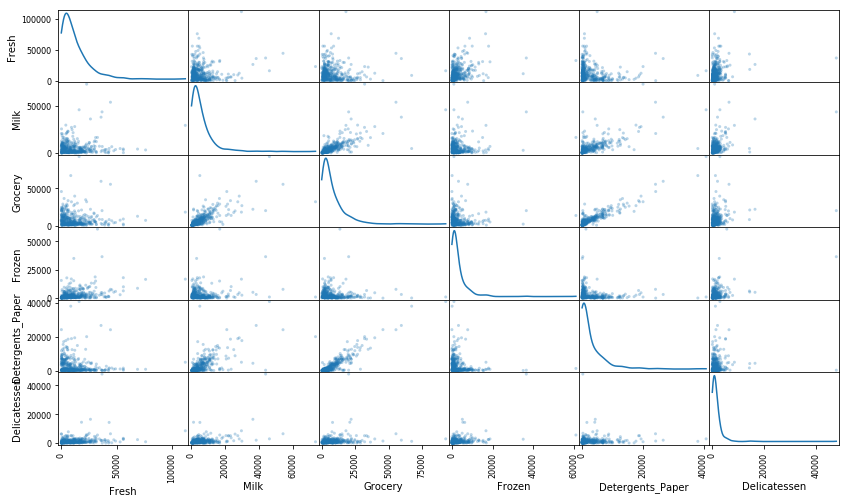

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?



The features are positively skewed, which means that more than half of the features of the data is less than their mean

Graphically, milk, grocery and detergent_paper have strong pairwise correlation with coorelation greater than 0.5. Among them, detergents_paper is almost perfectly correlated with grocery items. It suggests that exclusion of either one of the item will have an insignificant effect on the predictive power.



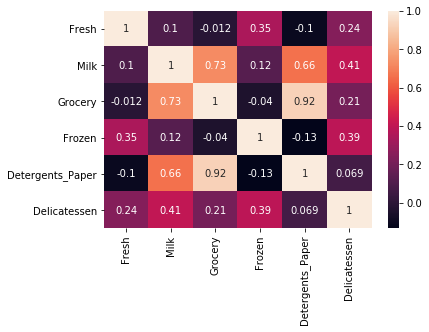

In [11]:
corr = data.corr()
import seaborn as sns

sns.heatmap(corr,annot=True)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


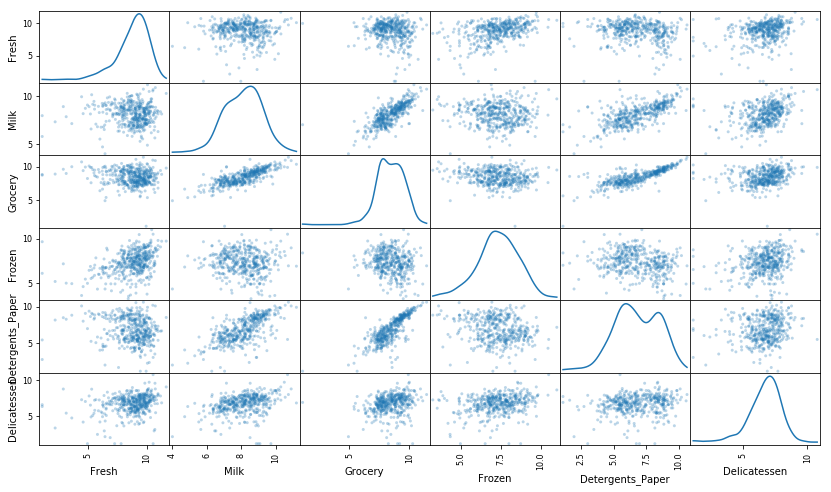

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data).copy()

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples).copy()

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.721602,10.049015,10.421865,8.816705,9.830594,8.541105


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
feature_outliers_df={}
for feature in log_data.keys():
    
    #Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data.loc[:,feature].quantile(0.25)
    
    #Calculate Q3 (75thpercentile of the data) for the given feature
    Q3 = log_data.loc[:,feature].quantile(0.75)
    
    #Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5

    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    feature_outliers_df[feature] = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [15]:
# number outlier features of a data
outliers={}
for key in feature_outliers_df.keys():
    
    for ind in feature_outliers_df[key].index:
        if(str(ind) in outliers.keys()):
            outliers[str(ind)] +=1
        else:
            outliers[str(ind)] =1
            
outliers_count = pd.Series(sorted(outliers.items(), key=lambda x:x[1], reverse=True))

outliers_count.head()


0    (154, 3)
1     (65, 2)
2     (66, 2)
3    (128, 2)
4     (75, 2)
dtype: object

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.


**Ans: **The 154th data point  appears as an outlier in 3 categories where 184th and 412 datapoint appear 2 times. 
The outlier customers spend very little in most of the categories

Although they are regarded as outliers, it is still plausible that they spend far less than those of other customers if they operate small stores.

Whether they should be deleted depends on the clustering algorithm. Kmeans is sensitive to outliers. During each iteration of the algorithm, the centroid is found by minimizing the squared distance between centroid and point within the cluster. The existence of outliers tend to pull the clustering centers towards the outliers

However, some density-based algorithm such as mean shifting clustering and DBSCAN is more resistant to outliers. Inclusion of outliers in the dataset probably won't do much harm to the accuracy






## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

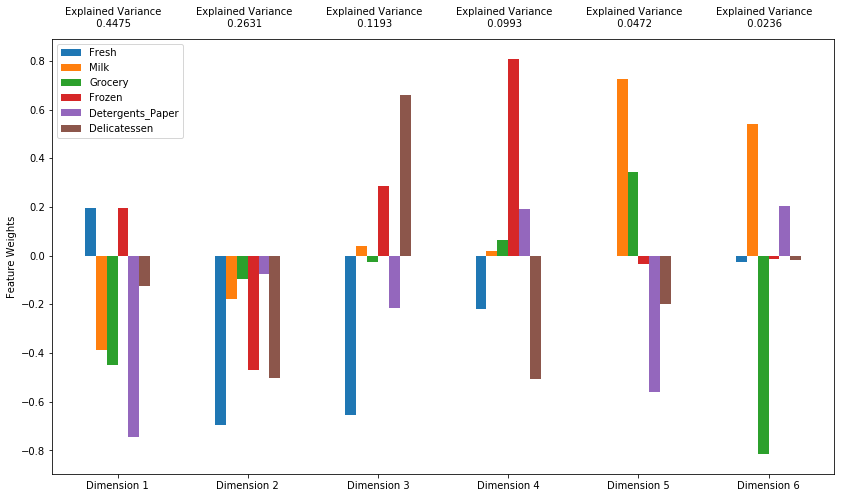

In [16]:
good_data = log_data.drop(log_data.index[[154,184,412]]).reset_index(drop = True)

from sklearn.decomposition import PCA

pca =PCA(6)

pca_samples = pca.fit_transform(good_data)

pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.


**Ans: **Around 71% of variance in the data can be explained by the 1st and the 2nd principal components.
As for the first 4 principal components, it explains 94% of the variance.

Feature weight indicates the correlation of the dimension with each original features.
 
For instance, a data with higher value of dimenion 1 have lower value of milk, grocery , detergent_paper and delicatessen and higher value of frozen and fresh food

1. Dim 1: utilities( detergent, grocery, milk)
1. Dim 2: food(frozen, fresh, delicatessen)
1. Dim 3: wet market(fresh food)
1. Dim 4: frozen food




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7468,-0.1300,-0.8908,-1.7290,0.2761,0.3939
1,-1.7501,-0.8974,0.2387,0.0181,0.1220,0.2348
2,-1.8053,-1.6800,1.3683,-0.4613,-0.3733,0.3416
3,1.2015,-1.3559,0.5429,0.4679,-0.6855,-0.6561
4,-0.6803,-2.4397,0.5315,-0.2798,-0.3051,-0.0429
5,-1.0599,-0.4036,-0.2253,-0.8910,0.1961,0.5352
6,-1.1404,0.1606,-1.2987,-0.6073,-0.4938,-0.1004
7,-1.5294,-0.9847,0.3922,-0.2398,-0.4538,-0.1285
8,-0.8921,0.5848,-0.5192,-0.8337,-0.1577,-0.0404
9,-2.8446,-0.8194,0.1469,-0.1670,-0.0277,-0.0787


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
pca2 = PCA(2,random_state=0).fit(good_data)

reduced_data = pca2.transform(good_data)
pca_samples = pca2.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.2015,-1.3559
1,-2.2806,-1.8470
2,-3.8323,-2.3626


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

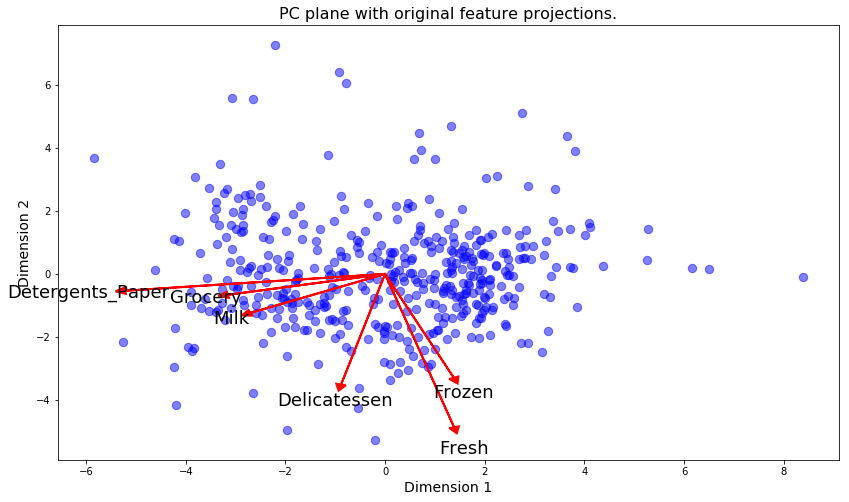

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca2)

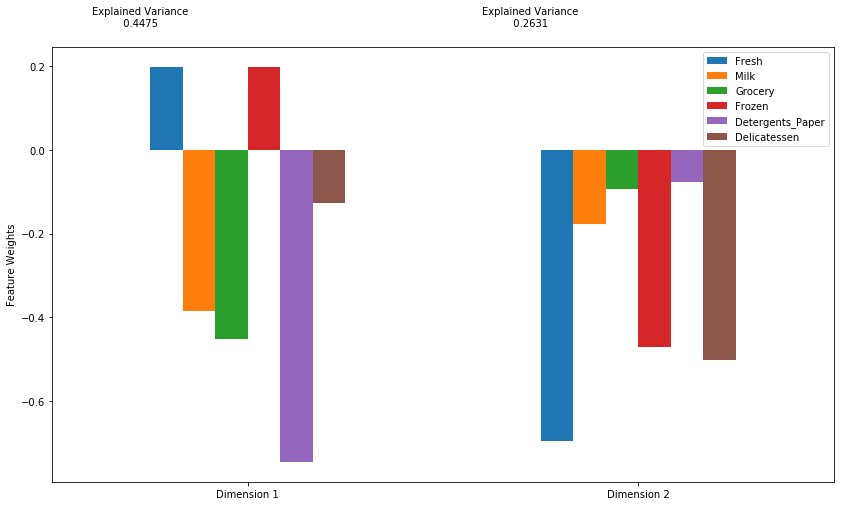

In [21]:
pca_results = vs.pca_results(good_data, pca2)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?


** Ans **:

* The absolute value of feature weight in a dimension is larger if the arrows point to that dimension. Feature weight indicates the amount of correlation with the dimension

* Arrows pointed by detergents_paper, milk , grocery are approximately parallel to Dim 1 axis

* Other features point to the direction of Dim2 direction.

* Two plots provide consistent result. The sizes of feature weight correspond to the directions of the arrows

* The direction of arrow correspond to the sign of the feature weight. For instance, all the categories point downwards matches the negative feature weights of dimension 2 in the feature weight diagram

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?


**kmeans**

* it is a fast algorithm. It grows linearly with the size of k and the dataset. It can also be used to set the initial cluster means, covariance matrix for gaussian mixture algorithm in order for it to converge faster.

**Gaussian Mixture**

* less restriction on the shape of the cluster. It can be elliptical
allow soft assignment. Each point has a probability of belonging to each of the clusters

By looking at the biplot, there is no clear distinction of groups. In this circumstances, there may be samples lying between several clusters, which means that there are more uncertainty associated with the cluster assignment. It is better to use GMM as it compute the probability of the datapoints belonging to different clusters

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [22]:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
results_pca ={}
for i in  range(2,10):
    results_pca[i] = {}
    clusterer = GaussianMixture(i,random_state=i*2)

    clusterer.fit(reduced_data)
#Predict the cluster for each data point
    preds =  results_pca[i]['preds'] =  clusterer.predict(reduced_data)
    results_pca[i]['clusterer'] = clusterer
#Find the cluster centers
    results_pca[i]['centers'] = clusterer.means_
    

    results_pca[i]['sample_preds']  = sample_preds = clusterer.predict(pca_samples)


    score = silhouette_score(reduced_data, preds)
    results_pca[i]['score'] = score
    
    
    print('score for {} clusters = {}'.format(i,score))

score for 2 clusters = 0.4179857445707604
score for 3 clusters = 0.39970889835200946
score for 4 clusters = 0.2450542119496738
score for 5 clusters = 0.2183488883729551
score for 6 clusters = 0.29802343522082336
score for 7 clusters = 0.33709435166263
score for 8 clusters = 0.34363875508723624
score for 9 clusters = 0.21101264696987806


In [23]:
sorted_results_pca =sorted(results_pca.items(), key = lambda x:x[1]['score'], reverse=True )
preds = sorted_results_pca[0][1]['preds']
centers = sorted_results_pca[0][1]['centers']
pca = sorted_results_pca[0][1]['clusterer']
sample_preds = sorted_results_pca[0][1]['sample_preds'] 




### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?



**Ans: **Dividing the data into 2 clusters gives the best score

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

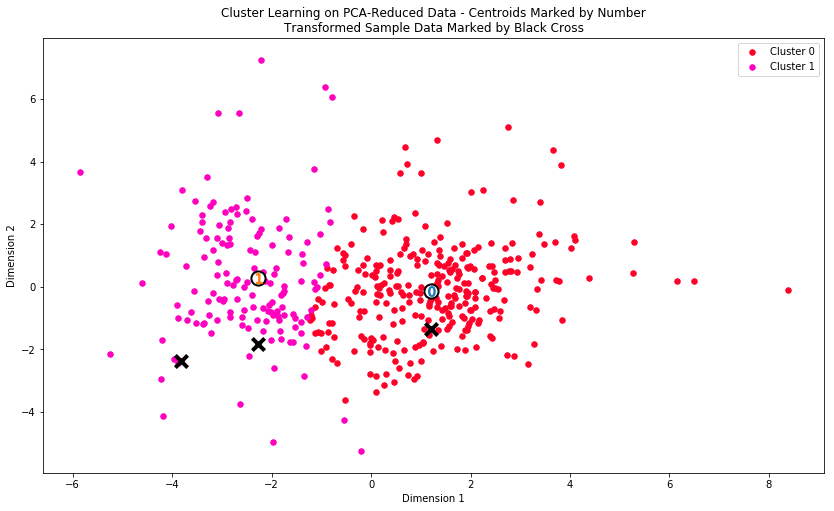

In [24]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [35]:

log_centers = pca2.inverse_transform(centers)
##Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8874.0,2188.0,2736.0,2053.0,367.0,742.0
Segment 1,3352.0,7799.0,12643.0,853.0,4756.0,938.0


In [26]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


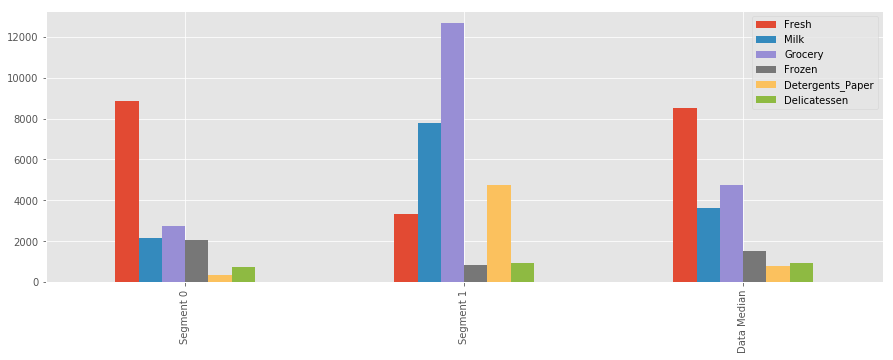

In [27]:
compare = true_centers.copy()
compare.loc[true_centers.shape[0]] = data.median()

plt.style.use('ggplot')
compare.plot(kind='bar', figsize=(15, 5))
labels = true_centers.index.values.tolist()
labels.append('Data Median')
plt.xticks(range(compare.shape[0]), labels)
plt.show()

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?



**Segment 1** 
* supermarket. The purchcase cost in utilities is higher than the medium whereas the expenditure in food such as frozen and fresh is lower than the median

**Segment 0** 
* restaurant. Only the cost in frozen and fresh food exceeds the median





### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [28]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Sample point 0 **
* predicted to be in Cluster 0(restaurant) vs deli --> consistent

**Sample point 1** 
* predicted to be in Cluster 1(supermarket) vs wholesale retailer --> consistent

**Sample point 2**
* Sample point 2 predicted to be in Cluster 1(supermarket) vs wholesale retailer --> consistent




## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*


Bayesian A/B testing framework is employed:

* For each cluster of customers, 20% of customers are experimented with the new scheme.
Each week, the distributor will survey on the service satisfaction, which can be satified  or dissatified.
For the experiment and control groups in each cluster, the ratio of satified customers over the total is calculated

* We then assume a prior of uniform probabilities on the satisfaction ratio. Results from survey in each week sequentially update posterior distribution of satisfaction. The probabilities will converge when more data is fed into the model. 

* In the final stage, the posterior probabilities of satisfaction ratio of control and experiment group are compared in each cluster. Expected satisfactions is computed and they can be compared to see how the new scheme affect each cluster of the customers

* To illustrate, a hypothetical AB test is conducted belowed






In [29]:
# create a class that generate random data for bayesian A/B testing framework
class bayes_AB:
    
    def __init__(self,no_of_clusters,samples_per_cluster, ratios, experiment_ratio,iterations):
        self.no_of_clusters = no_of_clusters
        self.samples_per_cluster = samples_per_cluster
        self.ratios =ratios
        self.experiment_ratio = experiment_ratio
        self.iterations= iterations
        
    def generate(self):
        ex_n = self.samples_per_cluster*self.experiment_ratio
        con_n = self.samples_per_cluster - ex_n
        ratios_res = np.zeros((self.iterations,2,self.no_of_clusters,2))
       
        for num in range(self.iterations):
            
            for i in range(self.no_of_clusters):
                n = np.random.binomial(ex_n,self.ratios[0][i])
                n2 = np.random.binomial(con_n, self.ratios[1][i])
                # bayesian updating of the belief about the satisfaction ratio
                #assume a beta(1,1) prior belief
                
                if(num==0):
            
                    ratios_res[num][0][i][0]=1+n
                    ratios_res[num][0][i][1]=1+ ex_n-n
                
                    ratios_res[num][1][i][0]=1+n2
                    ratios_res[num][1][i][1]=1+ con_n-n2
                
                else:
                    
                    ratios_res[num][0][i][0]=ratios_res[num-1][0][i][0]+n
                    ratios_res[num][0][i][1]=ratios_res[num-1][0][i][1]+ ex_n-n
                
                    ratios_res[num][1][i][0]=n2 + ratios_res[num-1][1][i][0]
                    ratios_res[num][1][i][1]=con_n-n2 +ratios_res[num-1][1][i][1]
                    
            
        return ratios_res
    

In [30]:
#unknown true satisfaction ratios for experiment and control groups in different clusters
ratios = np.array([[0.3,0.2],[0.25,0.18]])

# initialize a AB testing experiment
# Perform experiment on each of the 2 cluster
# each cluster consists of 100 samples and 40% of them will be experimented with a new scheme
#iterate 30 times
AB1 =bayes_AB(2,100,ratios,0.4,30)

#generate data
res = AB1.generate()

In [31]:
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


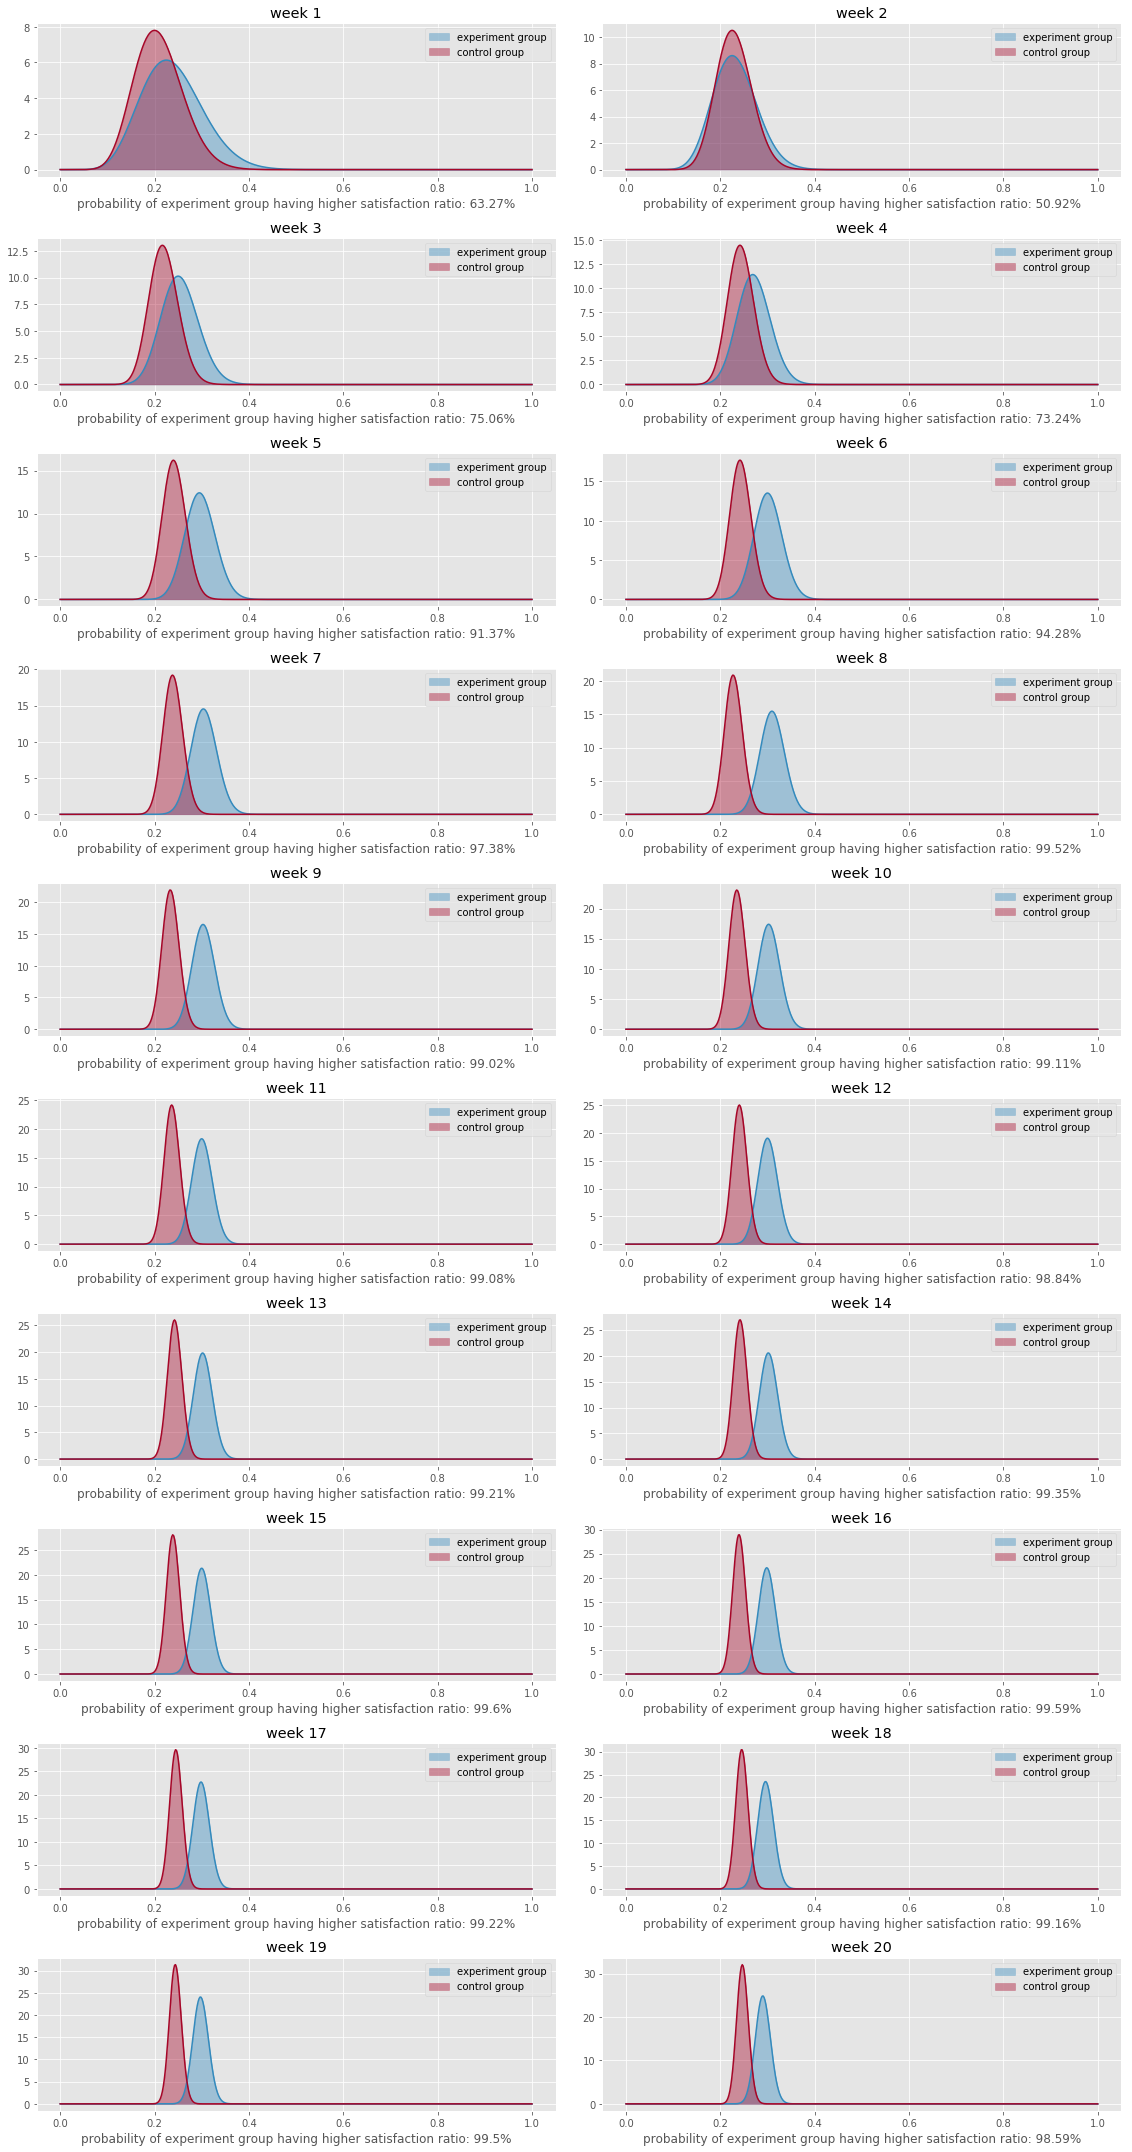

In [36]:
x = np.linspace(0,1,500)
from IPython.core.pylabtools import figsize

figsize(16,30)

for t in range(20):
    y = stats.beta.pdf(x,res[t][0][0][0],res[t][0][0][1])
    y2 = stats.beta.pdf(x,res[t][1][0][0],res[t][1][0][1])
    n = 0
    for i in range(20000):
        n+=1 if stats.beta.rvs(res[t][0][0][0],res[t][0][0][1]) > stats.beta.rvs(res[t][1][0][0],res[t][1][0][1]) else 0
    
    greater = np.round(n/20000*100,2)
    
    ax = plt.subplot(10,2,t+1)
    plt.plot(x,y,color="#348ABD")
    plt.plot(x,y2,color="#A60628")
    plt.fill_between(x,0,y,color="#348ABD", alpha=0.4, label='experiment group')
    plt.fill_between(x,0,y2,color="#A60628", alpha=0.4, label='control group')
    plt.title("week %d" % (t+1))
    plt.xlabel("probability of experiment group having higher satisfaction ratio: "+ str(greater) +'%')
    plt.legend()
    
#plt.suptitle("bayesian updating of posterior probability")
plt.tight_layout()


In each subplot, posterior distributions of satisfaction in experiment and control group are ploted. Initially, two distribution are largely overlapped.As the experiment carries on, the distribution begins to converge as the data dominates the prior belief about satisfaction ratios.
The distribution of the experiment group lies on the left side of the other distribution. 

The probability of the experiment group having larger ratio is reported in each subplot. In week 20, the probability is estimated to be 98.03%, which is consistent with results implied from the true satisfaction ratio(0.3>0.27)

To evaluate the influence of the scheme on a particular cluster, posterior mean of the distributions are computed. Suppose the experiment finishes at the end of week 10


In [33]:
mean_ex = np.round(res[10][0][0][0]*100 / (res[10][0][0][0] + res[10][0][0][1]),2) 
mean_con = np.round(res[10][1][0][0]*100 / (res[10][1][0][0] + res[10][1][0][1]),2)

print("The expected satisfaction ratio in experiment group is {}%".format(mean_ex) )
print("The expected satisfaction ratio in control group is {}%".format(mean_con) )


The expected satisfaction ratio in experiment group is 30.09%
The expected satisfaction ratio in control group is 23.72%


The expected ratios are consistent with the true ratios

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Ans**: Using the six features and the  customers segments as the label, we can construct a decision tree to classify the new data points

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

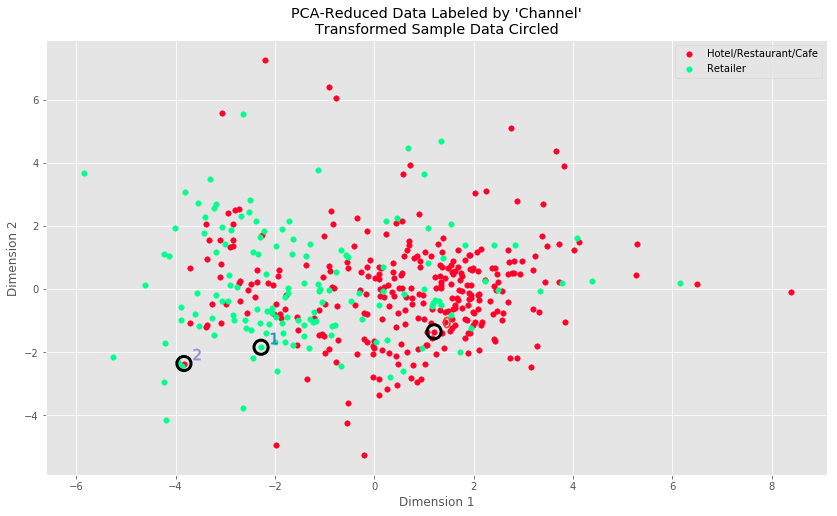

In [34]:
# Display the clustering results based on 'Channel' data
outliers=[]
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

* As shown in the previous graph, the clustering algorithm sepatate the cluster 1 and 2 approximately at dimension1 =-1.
The channel-labeled graph shows similar pattern, with a few points falling on the other clusters.

* In regions occupied by cluster 0 and 1, there exists both channels. For instance, some customers belonging to hotel/restaurant/cafe are classified as supermarket. The definition of customer segments is not quite consistent. The clustering model makes errors in classifying the retailers type.

* Despite that, most of the points are consistent with channels as shown by the graph above. Restaurant cluster corresponds to the hotel/restaurant/cafe group and sueprmarket cluster matches the retailers group



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.